In [1]:
# https://lmc2179.github.io/posts/confidence_prediction.html


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import scipy as sp
import scipy.stats as stats
sns.set()

In [2]:
week = 24  # time length of total observation (in weeks)
bmi = 22  # unit in lbs       
n = 56  # number of measurements per week
dist = 'normal'  # Daily weight fluctuation:  'normal' or 'uniform'

In [3]:
print("\nTotal weight loss time = ", week, "weeks")
print("Starting BMI = ", bmi)
print("Number of measurements per week = ", n)

if dist == 'uniform':
    print('\nUNIFORM Distribution for Daily Weight Fluctuation')
elif dist == 'normal':
    print("\nNORMAL Distribution for Daily Weight Fluctuation")


Total weight loss time =  24 weeks
Starting BMI =  22
Number of measurements per week =  56

NORMAL Distribution for Daily Weight Fluctuation


In [4]:
wl = 1 - 0.01
#if weight == 230:  # BMI = 34:    230 lbs   use 1.5% weight reduction (Obese)
#    txt = "BMI = 34:   1.5% weight reduction (Obese)"
#    print(txt)
#    wl = 1 - 0.015
#elif weight == 190:  # BMI = 28:    190 lbs   use 1.0% weight reduction (Overweight)
#    txt = "BMI = 28:   1.0% weight reduction (Overweight)"
#    print(txt)
#    wl = 1 - 0.01
#elif weight == 150:  # BMI = 22:    150 lbs   use 0.5% weight reduction (Normal)
#    txt = "BMI = 22:   0.5% weight reduction (Healthy)"
#    print(txt)
#    wl = 1 - 0.005
#elif weight == 120:  # BMI = 18.5:  120lbs    use no weight reduction (Normal lean)
#    txt = "BMI = 18.5: no weight reduction (Lean)"
#    print(txt)
#    wl = 1 - 0

In [5]:
df = pd.DataFrame()
# data = np.empty([1, 21])
x = []
y = []

In [6]:
# Create the x axis for the time columns from week 1 - week 24

for j in range(n):
    meas = [x for x in range(1, 25)]
    x = np.append(x, meas, axis=0)  # time
x = [int(x) for x in x]
x = sorted(x)
x = np.transpose(x)
# print(x.shape)

In [7]:
# Create y axis for the BMI measurements

for i in range(week):
    time = i + 1
    avg_bmi = bmi * wl ** i
    # print(time)
    # print("%.2f" % avg_weight)
    #if dist == 'uniform':
    #ll = avg_bmi * (1 - 0.0174)  # 1.74% body fat fluctuation by imaging (or close to the weight fluc)
    #ul = avg_bmi * (1 + 0.0174)
    # w = np.random.uniform(ll, ul, n)  # assuming uniform distribution during a day
    #elif dist == 'normal':
    w = np.random.normal(avg_bmi, 1, n)  # assuming normal distribution during a day
        # w = np.expand_dims(w, axis=0)
        # print(type(w))

    # col_list = ['week' + str(x) for x in range(1, week+1)]
    # weeks = [x for x in range(1, 21)]
    # print(weeks)
    y = np.append(y, w, axis=0)  # weight

y = np.transpose(y)
# print(y.shape)
data = {'Time': [x], 'Weight': [y]}
# print(data)
df = pd.DataFrame(data)
# print(df)

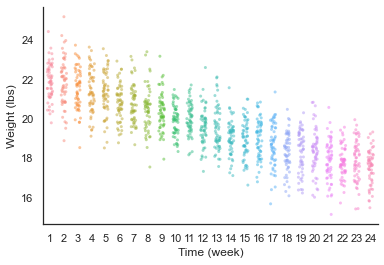

In [8]:
sns.set_style("white")
# sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
#if weight == 120:
#    plt.ylim([110, 130])

# ax = sns.swarmplot(x=x, y=y, s=3, alpha=0.6, color='k')
ax = sns.stripplot(x=x, y=y, s=3, alpha=0.5, jitter=0.2)
# ax = sns.stripplot(x=x, y=y, s=3, alpha=0.6, color='k')
# ax = sns.boxplot(x=x,y=y, color='gray')
# ax = sns.boxplot(x=x, y=y, boxprops=dict(alpha=0.5))

# ax = sns.boxplot(x=x, y=y, color='white')

# plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
# plt.setp(ax.lines, color='k')

ax.set_xlabel("Time (week)")
ax.set_ylabel("Weight (lbs)")
# ax.set_title(txt)
# plt.title('BMI = 30')
# plt.scatter(x, y)
sns.despine()
plt.show()

# ax = sns.swarmplot(x="week22", y='week1', data=df)

# avg_weight = [weight * i for i in range(2, week)]

In [9]:
import statsmodels.api as sm

In [10]:
model = sm.OLS(y,x)
results = model.fit()

In [11]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.702
Model:                            OLS   Adj. R-squared (uncentered):              0.702
Method:                 Least Squares   F-statistic:                              3170.
Date:                Wed, 29 Dec 2021   Prob (F-statistic):                        0.00
Time:                        12:21:16   Log-Likelihood:                         -5098.9
No. Observations:                1344   AIC:                                  1.020e+04
Df Residuals:                    1343   BIC:                                  1.021e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [12]:
res = sm.OLS(y, x).fit()
print(df)

                                                Time  \
0  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                              Weight  
0  [22.82570413486534, 22.635329635549343, 21.747...  


/Users/jiehawes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


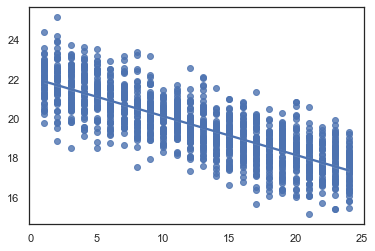

In [13]:
# import libraries
import pandas
import numpy
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
# import libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
  
# create random data
#np.random.seed(0)
#x = np.random.randint(0, 10, 10)
#y = x+np.random.normal(0, 1, 10)
  
# create regression plot
ax = sns.regplot(x, y, ci=80)

In [17]:
#!pip install tsmoothie
print(data)

{'Time': [array([ 1,  1,  1, ..., 24, 24, 24])], 'Weight': [array([22.82570413, 22.63532964, 21.74750434, ..., 17.21088891,
       18.04250781, 17.75446754])]}


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tsmoothie.smoother import *
from tsmoothie.utils_func import sim_randomwalk

# generate 10 randomwalks of length 200
#np.random.seed(33)
#data = sim_randomwalk(n_series=10, timesteps=200, 
#                      process_noise=10, measure_noise=30)

# operate smoothing
smoother = LowessSmoother(smooth_fraction=0.1, iterations=1)
smoother.smooth(data)

# generate intervals
low, up = smoother.get_intervals('prediction_interval', confidence=0.05)

# plot the first smoothed timeseries with intervals
plt.figure(figsize=(11,6))
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue')
plt.plot(smoother.data[0], '.k')
plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)

ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
from skmisc.loess import loess
import numpy as np
import pylab as plt


#x = np.linspace(0,2*np.pi,100)
#y = np.sin(x) + np.random.random(100) * 0.4

l = loess(x,y)
l.fit()
pred = l.predict(x, stderror=True)
conf = pred.confidence()

lowess = pred.values
ll = conf.lower
ul = conf.upper

plt.plot(x, y, '+')
plt.plot(x, lowess)
plt.fill_between(x,ll,ul,alpha=0.1)
plt.show()

In [ ]:
data = {'x':x, 'y':y}
frame = pd.DataFrame(data, columns=['x', 'y'])
frame = pd.DataFrame(data)
sns.lmplot('x', 'y', frame, ci=95)

In [ ]:
plt.scatter(x, y)

In [ ]:
plt.fill_between(x,ll,ul,alpha=0.2)

In [ ]:
pred = l.predict(x, stderror=True)
conf = pred.confidence()

lowess = pred.values
ll = conf.lower
ul = conf.upper

plt.plot(x, y, '+')
plt.plot(x, lowess)
plt.fill_between(x,ll,ul,alpha=.83)
plt.show()

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x = np.arange(0, 10, 0.05)
y = np.sin(x)

# Define the confidence interval
ci = 0.1 * np.std(y) / np.mean(y)
#ci = 2* np.std(y)/np.sqrt(len(x))

plt.plot(x, y, color='blue', lw=7)

plt.fill_between(x, (y-ci), (y+ci), color='yellow', alpha=0.5)

plt.show()

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

#some example data
x = np.linspace(0.1, 9.9, 20)
y = 3.0 * x
#some confidence interval
ci = 1.96 * np.std(y)/np.sqrt(len(x))

fig, ax = plt.subplots()
ax.plot(x,y)
ax.fill_between(x, (y-ci), (y+ci), color='y', alpha=.3)

In [ ]:
# import libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
  
# generate random data
np.random.seed(0)
x = np.random.randint(0, 30, 100)
y = x+np.random.normal(0, 1, 100)
  
# create lineplot
ax = sns.lineplot(x, y)

In [ ]:
#!pip install git+https://github.com/has2k1/plotnine.git
#!pip install scikit-misc

from skmisc.loess import loess
import numpy as np
import pylab as plt


x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.4

l = loess(x,y)
l.fit()
pred = l.predict(x, stderror=True)
conf = pred.confidence()

lowess = pred.values
ll = conf.lower
ul = conf.upper

plt.plot(x, y, '+')
plt.plot(x, lowess)
plt.fill_between(x,ll,ul,alpha=.33)
plt.show()